In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#import matplotlib.colors as mcolors

# DSCI 235 Final Project

Data Source: https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017

GitHub: https://github.com/mje17/DSCI235
## Project Description
Soccer, known as football to the majority of people, is the most popular sport in the world. Nearly all countries have a national team. Fans are drawn to major competitions such as the FIFA World Cup and the Olympics, as well as many smaller competitions throughout the year and international friendly games. The dataset I have selected includes results and other information on international football matches from 1872 to 2021. There are over 40,000 recorded games over this time span. The sheer size of the dataset provides slight challenges in visualizing certain aspects of the data.

With this data, I intend to answer the following questions:
1.   Is there an advantage to playing on a home field or being the home team?
2.   Does success in international friendlies predict success in tournaments?
3.   Are there teams that are consistently successful over time?
4.   What countries host the most international matches?

The columns of the dataset are:
- __date__: date of the match (mm/dd/yyyy)
- __home_team__: home team country name
- __away_team__: away team country name
- __home_score__: full time goals scored by the home team
- __away_score__: full time goals scored by the away team
- __tournament__: name of tournament ('friendly' if not a tournament game)
- __city__: name of the city where the game was played
- __country__: name of the country where the game was played
- __neutral__: TRUE/FALSE column indicating whether the match was played at a neutral venue

In [2]:
results = pd.read_csv('C:/Users/mjmel/OneDrive - Colostate/DSCI 235/International_Football_Results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


_Note: The raw data included a full date for each match, so I used pandas DatetimeIndex functionality to create a column with only the year of the match. I chose to discard all data from before 1950 because the number of games per year before then was low enough as to be uninteresting. Only 3,000 of the total 43,000 games were before that year._

In [3]:
results['year'] = pd.DatetimeIndex(results['date']).year
results = results.loc[results['year'] >= 1950]
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
3078,1/24/1950,Zambia,DR Congo,1.0,0.0,Friendly,Kitwe,Northern Rhodesia,False,1950
3079,2/17/1950,Egypt,Greece,2.0,0.0,Friendly,Cairo,Egypt,False,1950
3080,2/26/1950,Bolivia,Chile,2.0,0.0,Friendly,La Paz,Bolivia,False,1950
3081,2/26/1950,Croatia,Serbia,4.0,1.0,Friendly,Zagreb,Yugoslavia,False,1950
3082,3/5/1950,Italy,Belgium,3.0,1.0,Friendly,Bologna,Italy,False,1950


_Note: The dataset did not include the winner of each match so I created two more columns. "winner team" indicates whether the home or away team won or if the game ended in a draw. "winner country" contains the name of the country that won the game if there was a winner._

In [4]:
results['winner team'] = np.where(results['home_score'] > results['away_score'], 'Home', np.where(results['home_score'] == results['away_score'], 'Draw', 'Away'))
results['winner country'] = np.where(results['winner team'] == 'Home', results['home_team'], np.where(results['winner team'] == 'Away', results['away_team'], 'Draw'))
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner team,winner country
3078,1/24/1950,Zambia,DR Congo,1.0,0.0,Friendly,Kitwe,Northern Rhodesia,False,1950,Home,Zambia
3079,2/17/1950,Egypt,Greece,2.0,0.0,Friendly,Cairo,Egypt,False,1950,Home,Egypt
3080,2/26/1950,Bolivia,Chile,2.0,0.0,Friendly,La Paz,Bolivia,False,1950,Home,Bolivia
3081,2/26/1950,Croatia,Serbia,4.0,1.0,Friendly,Zagreb,Yugoslavia,False,1950,Home,Croatia
3082,3/5/1950,Italy,Belgium,3.0,1.0,Friendly,Bologna,Italy,False,1950,Home,Italy


## \#1. Is there an advantage to playing on a home field or being the home team?
"Home vs. Away Goals" was recently removed as a tiebreaker in leagues and tournaments, so I am curious if this was the right decision or if there is in fact a home advantage. To examine this, I looked at the "winner team" column. I created three different DataFrames to see if neutral locations have an effect on the idea of a home field advantage and then plotted the number of home wins, away wins, and draws for each year for each DataFrame.

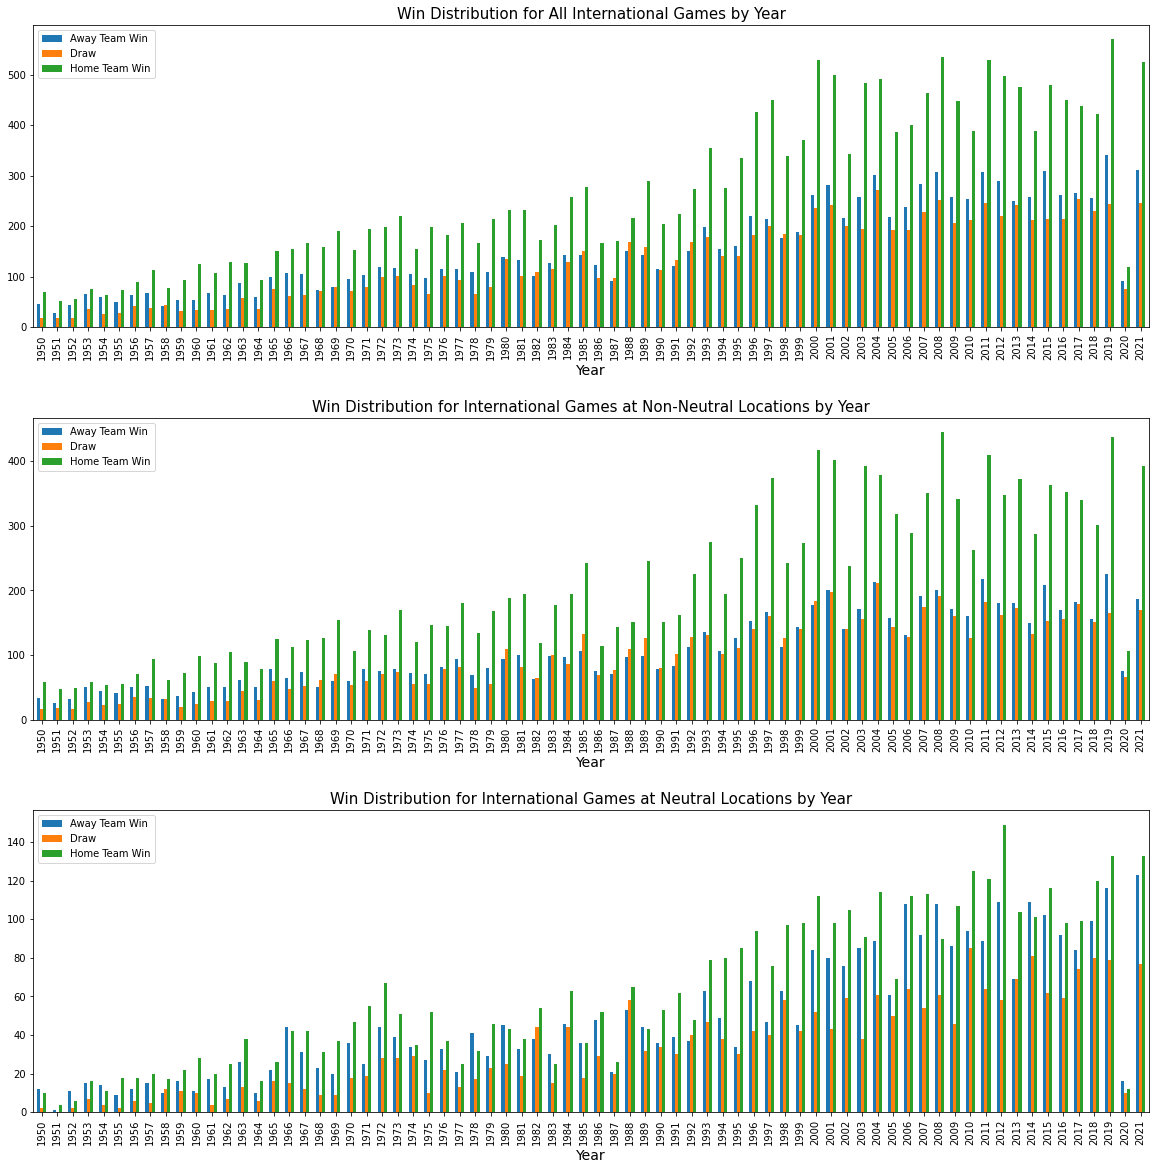

In [5]:
#results for all games
yearly_results = results.groupby('year')['winner team'].value_counts().to_frame().unstack()

#results for games at non-neutral locations
non_neutral = results[results['neutral'] == False]
yearly_non_results = non_neutral.groupby('year')['winner team'].value_counts().to_frame().unstack()

#results for games at neutral locations
neutral = results[results['neutral'] == True]
yearly_neutral_results = neutral.groupby('year')['winner team'].value_counts().to_frame().unstack()


fig, axs = plt.subplots(3, 1, figsize = (20,20))
yearly_results.plot(kind = 'bar', width = 0.6, ax = axs[0])

axs[0].legend(labels = ['Away Team Win', 'Draw', 'Home Team Win'])
axs[0].set_title('Win Distribution for All International Games by Year', size = 15)
axs[0].set_xlabel('Year', size = 14)

yearly_non_results.plot(kind = 'bar', width = 0.6, ax = axs[1])
axs[1].legend(labels = ['Away Team Win', 'Draw', 'Home Team Win'])
axs[1].set_title('Win Distribution for International Games at Non-Neutral Locations by Year', size = 15)
axs[1].set_xlabel('Year', size = 14)

yearly_neutral_results.plot(kind = 'bar', width = 0.6, ax = axs[2])
axs[2].legend(labels = ['Away Team Win', 'Draw', 'Home Team Win'])
axs[2].set_title('Win Distribution for International Games at Neutral Locations by Year', size = 15)
axs[2].set_xlabel('Year', size = 14)

plt.subplots_adjust(hspace = 0.3)

## Results
### Is there an advantage to playing on a home field?
- __For each year, the number of home team wins is far higher than away team wins or draws.__ This result is even more noticeable when the games played at neutral locations were factored out.

### To being the home team?
- __The number of home team wins is highest even for games played at neutral locations.__ The three values are much closer and away team wins is occasionally higher than home team wins, but home is still highest the majority of the time.

## \#2: Does success in international friendlies predict success in tournaments?
International teams are allowed to change their squads (the players that participate in a match) quite often. This means that many teams use friendlies as an opportunity to test players and new formations, whereas tournament squads are fairly consistent throughout a tournament and over a few years. With these differences, I am wondering if there is any correlation between winning friendly games and winning tournament games. I examined the average number of friendly wins and tournament wins for each country per year.

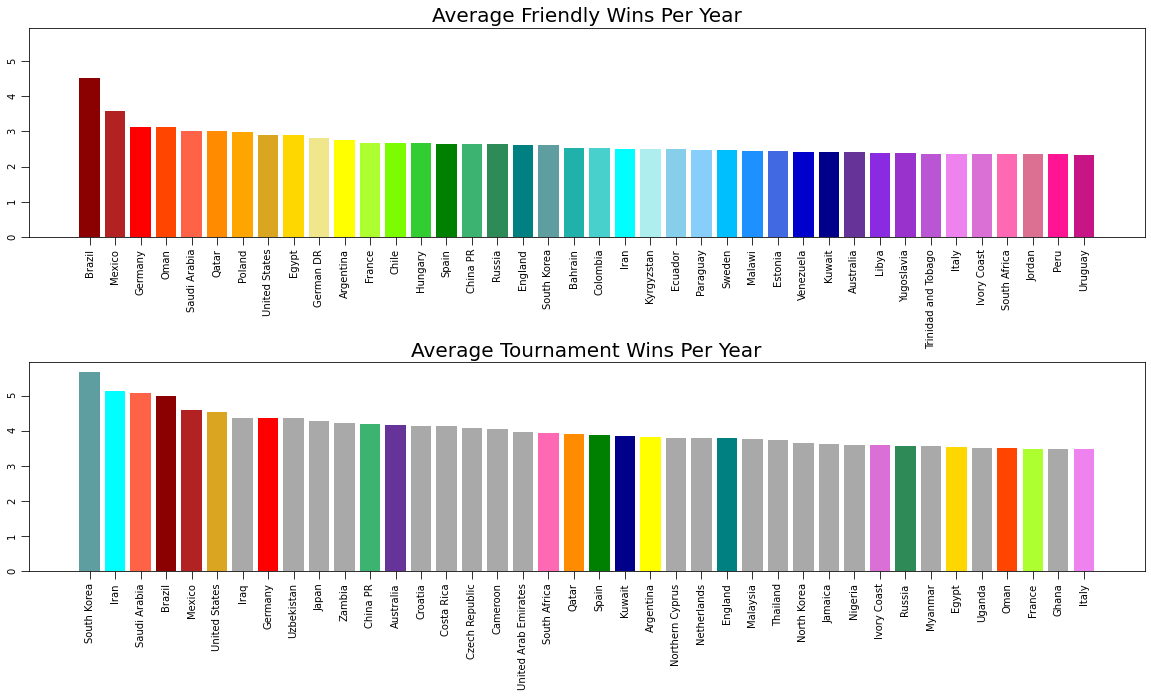

In [6]:
friendlies = results[results['tournament'] == 'Friendly']
tournaments = results[results['tournament'] != 'Friendly']

friendly_winners = friendlies.groupby('year')['winner country'].value_counts().to_frame()
friendly_winners.rename(columns = {'winner country': 'friendly wins'}, inplace = True)
friendly_winners.drop('Draw', level = 'winner country', axis = 0, inplace = True)
friendly_winners = friendly_winners.swaplevel().groupby('winner country').mean()
friendly_winners = friendly_winners.sort_values(by = ['friendly wins'], ascending = False).iloc[0:40]
tourney_winners = tournaments.groupby('year')['winner country'].value_counts().to_frame()
tourney_winners.rename(columns = {'winner country': 'tournament wins'}, inplace = True)
tourney_winners.drop('Draw', level = 'winner country', axis = 0, inplace = True)
tourney_winners = tourney_winners.swaplevel().groupby('winner country').mean()
tourney_winners = tourney_winners.sort_values(by = ['tournament wins'], ascending = False).iloc[0:40]

color1 = ['darkred', 'firebrick', 'red', 'orangered', 'tomato', 'darkorange', 'orange', 'goldenrod', 'gold', 'khaki', 
          'yellow', 'greenyellow', 'lawngreen', 'limegreen', 'green', 'mediumseagreen', 'seagreen', 'teal', 'cadetblue', 
          'lightseagreen', 'mediumturquoise', 'aqua', 'paleturquoise', 'skyblue', 'lightskyblue', 'deepskyblue', 
          'dodgerblue', 'royalblue', 'mediumblue', 'darkblue', 'rebeccapurple', 'blueviolet', 'darkorchid', 'mediumorchid', 
          'violet', 'orchid', 'hotpink', 'palevioletred', 'deeppink', 'mediumvioletred']

color2 = ["cadetblue", "aqua", "tomato", "darkred", "firebrick", "goldenrod", "darkgrey", "red", "darkgrey", "darkgrey", 
          "darkgrey", "mediumseagreen", "rebeccapurple", "darkgrey", "darkgrey", "darkgrey", "darkgrey", "darkgrey", 
          "hotpink", "darkorange", "green", "darkblue", "yellow", "darkgrey", "darkgrey", "teal", "darkgrey", "darkgrey", 
          "darkgrey", "darkgrey", "darkgrey", "orchid", "seagreen", "darkgrey", "gold", "darkgrey", "orangered", 
          "greenyellow", "darkgrey", "violet"]

fig, axs = plt.subplots(2, 1, sharey = True, figsize = (20,10))
axs[0].bar(x = friendly_winners.index, height = friendly_winners['friendly wins'], color = color1)
axs[0].tick_params(labelrotation = 90, size = 8)
axs[0].set_title('Average Friendly Wins Per Year', size = 20)
axs[1].bar(x = tourney_winners.index, height = tourney_winners['tournament wins'],color = color2)
axs[1].tick_params(labelrotation = 90, size = 8)
axs[1].set_title('Average Tournament Wins Per Year', size = 20)
plt.subplots_adjust(hspace = 0.6)

## Results
### Does success in international friendlies predict success in tournaments?
- __21 of the 40 teams with the most friendly wins are also in the top 40 for tournament wins.__
- __8 of the top 10 for friendlies are in the top 40 for tournaments.__

## \#3: Are there teams that are consistently successful over time?
People tend to like to cheer for successful teams if they are not going to cheer for their own country. Being unsuccessful may even be the reason someone chooses not to cheer for their home country. Is there a best choice of team to support or maybe a few? For this question, I looked at the number of wins per year for some of the most successful countries.

In [7]:
winners = results[results['winner country'] != 'Draw']
winners = winners['winner country'].value_counts()
print(winners)

Brazil         589
Germany        473
South Korea    467
Mexico         438
England        433
              ... 
Surrey           1
San Marino       1
Kabylia          1
Timor-Leste      1
Micronesia       1
Name: winner country, Length: 297, dtype: int64


Here we see that __Brazil__, __Germany__, __South Korea__, __Mexico__, and __England__ have the most wins overall from 1950-2021. This shows _general_ success, but were they consistent?

Text(0.5, 0, 'Year')

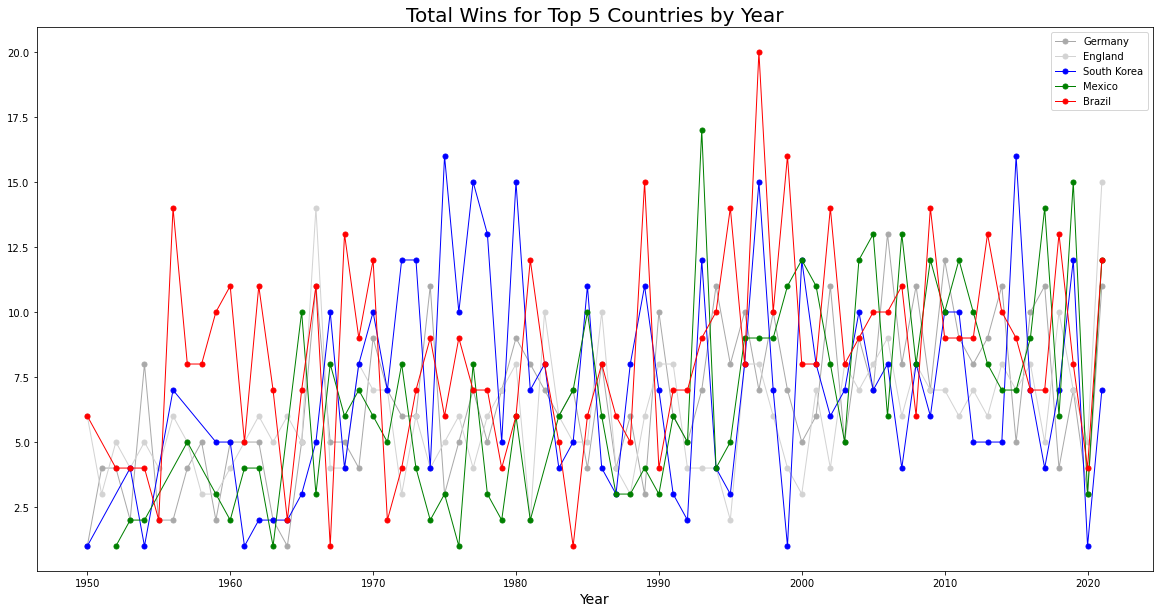

In [8]:
#top 5: Brazil (589), Germany (473), South Korea (467), Mexico (438), England (433)
brazil = results[results['winner country'] == 'Brazil']
brazil = brazil.groupby('year')['date'].count().to_frame()
brazil = brazil.rename(columns = {'date': 'wins'})
germany = results[results['winner country'] == 'Germany']
germany = germany.groupby('year')['date'].count().to_frame()
germany = germany.rename(columns = {'date': 'wins'})
southkorea = results[results['winner country'] == 'South Korea']
southkorea = southkorea.groupby('year')['date'].count().to_frame()
southkorea = southkorea.rename(columns = {'date': 'wins'})
mexico = results[results['winner country'] == 'Mexico']
mexico = mexico.groupby('year')['date'].count().to_frame()
mexico = mexico.rename(columns = {'date': 'wins'})
england = results[results['winner country'] == 'England']
england = england.groupby('year')['date'].count().to_frame()
england = england.rename(columns = {'date': 'wins'})

ax = plt.gca()
germany.plot(ax = ax, linewidth = 1, marker = '.', markersize = 10, color = 'darkgrey')
england.plot(ax = ax, linewidth = 1, marker = '.', markersize = 10, color = 'lightgrey')
southkorea.plot(ax = ax, linewidth = 1, marker = '.', markersize = 10, color = 'blue')
mexico.plot(ax = ax, linewidth = 1, marker = '.', markersize = 10, color = 'green')
brazil.plot(ax = ax, figsize = (20,10), linewidth = 1, marker = '.', markersize = 10, color = 'red')

plt.legend(labels = ['Germany', 'England', 'South Korea', 'Mexico', 'Brazil'])
plt.title('Total Wins for Top 5 Countries by Year', size = 20)
plt.xlabel('Year', size = 14)

## Results
### Are there teams that were consistently successful over time?
- __Brazil and South Korea were somewhat consistent for short periods of time.__
- None of the 5 teams with the most wins overall seem to have won a consistent number of matches over several years.
- __Brazil__ had the most wins overall for the second half of the 1950s and into the 60s. They were once again fairly dominant for the late 1990s and early 2000s.
- __South Korea__ was fairly dominant for the 70s.
- __Mexico__ has had the most wins overall for several of the last 30 years, but not more than a couple in a row and they are near the bottom for the years in between.
- __Germany__ and __England__ only have a few years each with the most wins overall.

## \#4: What countries host the most international matches?
I am wondering if there is a link between successful teams and hosting matches.

Text(0.5, 1.0, 'International Matches Hosted by Country')

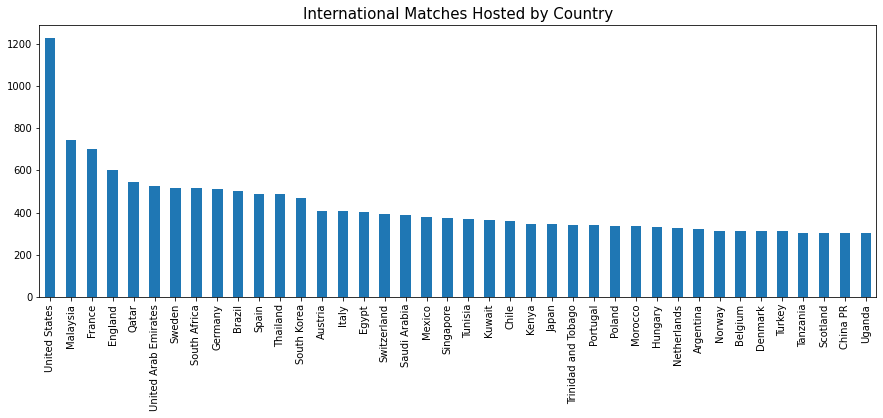

In [9]:
hosts = results['country'].value_counts().to_frame()
hosts = hosts.rename(columns = {'country': 'hosted_matches'})
hosts = hosts[hosts['hosted_matches'] >= 300]
hosts.plot(kind = 'bar', figsize = (15,5))
plt.legend().remove()
plt.title('International Matches Hosted by Country', size = 15)

## Results
### What countries host the most international matches?
- __The United States, Malaysia, and France host the most international matches.__ The United States hosts significantly more than any other country.
- __Three of the top 5 teams from #3 are in the top 10 for number of hosted matches.__ These are England, Germany, and Brazil. Mexico comes in at 19 and South Korea is not in the top 40.

## Conclusion
After working with the International Football Results dataset, it can be observed that there seems to be an advantage to playing on your home field. There also seems to be a slight advantage to being the home team when playing at a neutral location. Also, being successful in friendlies is not a great predictor for success in tournaments. There may be some correlation between the two, but it is not very strong. Furthermore, we can see that there has not been a single dominant team for a span of more than 10 years. Cheering for the underdog still has the opportunity to pay off. Lastly, the United States hosts the most matches, but that does not mean they are the most successful. In fact, as with friendlies and tournaments, there does not seem to be a very strong correlation between hosting and success.